# Z-toets IMDB

Een filmcriticus stelt dat de score van engelstalige films lager is dan gemiddeld.

Onderzoek met de dataset of deze filmcriticus gelijk heeft. Neem een steekproef (met ```pandas.DataFrame.sample(n=100,random_state=1)```) van 100 engelstalige films en beschouw de hele dataset als populatie. Neem als betrouwbaarheid 90%. Gebruik van de dataset alleen de filmgegevens waarbij zowel de taal (`language`) als de score (`imdb_score`) bekend zijn.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
movies = pd.read_csv('movie.csv') 

In [3]:
all_movies = movies[movies.imdb_score.notnull()]
all_movies = all_movies[all_movies.language.notnull()]

In [4]:
movies_english = all_movies[all_movies.language == 'English']

In [5]:
sample = movies_english.sample(n=100,random_state=1)

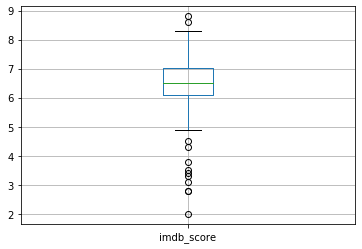

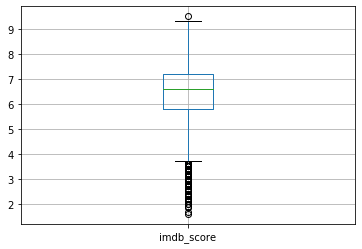

In [6]:
sample.boxplot(column="imdb_score")
plt.show()
all_movies.boxplot(column="imdb_score")
plt.show()

In [7]:
sample.imdb_score.mean()

6.354

In [8]:
all_movies.imdb_score.mean()

6.44116477837408

In [13]:
stdev_en = st.tstd(sample["imdb_score"])

print(stdev_en)

1.276708204087308


To determine the accuracy of our findings we have to do a Z-test. We will set out our hypothesis and null hypothesis and test the latter.

These are as follows:

H0 = English films score as well or better than other movies on IMDB. μother <= μenglish = 6.35

H1 = English films score significantly worse than other movies on IMDB. μother > μenglish = 6.35

In [20]:
n = 100
good_score = movies_english[movies_english.imdb_score >= all_movies.imdb_score.mean()].count()
q = .5
z_alpha = 1.29
mean_english_score = sample.imdb_score.mean()
mean_score = all_movies.imdb_score.mean()

se = stdev_en / (np.sqrt(n))

z = (mean_score - mean_english_score) / se
print(z)

0.6827306200040644


The z value we found from the calculation is 0.68, this is significantly lower than the value we'd want of 1.29 or higher, 
we can therefore not reject the nul hypothesis, and not prove the alternative hypothesis either.